In [1]:
# Imports and scripts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pathmagic
%matplotlib inline
with pathmagic.context():
    import Preprocess as Prep
    import RelativePaths as RP
    import Evaluation as Eva
    import Graphs
    import Utils

Gather.gather_team_mates_data()

Text(0.5, 1.0, 'Shows the number of files for every label, from JabRef')

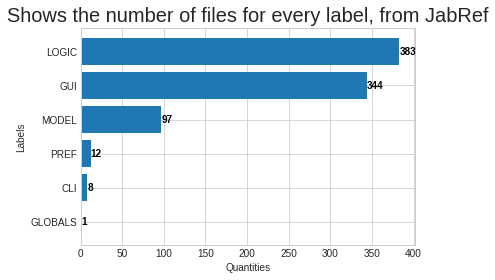

In [2]:
dataset_df = pd.read_csv(str(RP.getRawDataSet()))
y_labels = dataset_df.Label.unique()
x_quantity = [len(dataset_df.loc[dataset_df['Label']==label]) for label in y_labels]
tmp_df = pd.DataFrame({
    'Labels' : y_labels,
    'Quantity' : x_quantity
})
tmp_df = tmp_df.sort_values(by=['Quantity'])
plt.style.use("seaborn-whitegrid")
plt.barh(y=tmp_df.Labels, width=tmp_df.Quantity)
for i, v in enumerate(tmp_df.Quantity):
    plt.text(v, i, str(v), color='black', fontweight='bold', ha='left', va='center')

plt.xlabel('Quantities')
plt.ylabel('Labels')
plt.title('Shows the number of files for every label, from JabRef',fontsize = 20)

# Evaluation
The figure above shows the spread of the given concerns and imbalance in the dataset taken from the JabRef architecture.

### Static parts
__Train-test split,__ will be set at 10% for training, and 90% for evaluation.  
* __Metrics,__ the most relevant ones will be the following:  
   * Confusion matrix  
   * Precission  
   * Accuracy  
   * F1-score/value  
   * Average score 
    
----

### Preprocessing settings
```
settings = [
        ['extraction', 'parsing' ... ,'parsing],
        ...,
        ['extraction', 'parsing']
    ]
```
#### Extraction options
* Raw data: 'raw'
* Classes: 'c'
* Public methods: 'pm'
* Public variables/objects: 'pv'
* Import: 'lib'
* Packages: 'pac'
* Comments: 'com'
* Clear commands: 'clear'

#### Parsing options
* Lower case: 'lc'
* Remove single characters:  'sc'
* Remove stop words: 'sw'
* Remove java keywords: 'jk'
* Remove java annotations: 'ja' NOT IMPLEMENTED
* Remove java syntax ('jk','ja','sc'): 'js' NOT IMPLEMENTED
* Remove english stopwords: 'es'
* Remove numbers: 'nu'
* Separate compound words: 'scw'
* Default, then exit preprocess: 'd'
* Clear commands: 'clear'

___

# Testing different test sizes
## static part:
    - feature representation: CountVectorizer
    - PreProcsessing: s1 = [
    ['lib', 'tow', 'jk', 'scw','lc', 'stem'],
    ['pac', 'tow', 'jk'],
    ]
## testing:
    - Test different sample sizes: 5,10,15,20%
    - Train classifier with fix number of files per concern. e.g. 5 GUI, 5 PREF, 5 LOGIC etc..


In [3]:
# Parse the data according to the rules above
settings = [ 
    ['lib', 'tow', 'scw', 'jk', 'lc', 'stem'],
    ['pac', 'tow', 'jk',],
    #['c', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    #['pm', 'tow', 'scw', 'jk', 'lc', 'sw', 'stem'],
    #['pv', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
]
# file to save the result in
basic_file = '../Data/test_size_testing.csv'
basic_df = Prep.preprocess_settings(settings, basic_file)

maxEnt_accuracy_test1 = []
svm_accuracy_test1 = []
naive_accuracy_test1 = []

maxEnt_precision_test1 = []
svm_precision_test1 = []
naive_precision_test1 = []

maxEnt_recall_test1 = []
svm_recall_test1 = []
naive_recall_test1 = []

In [4]:
basic_df = pd.read_csv(basic_file)
# Remove GLOBALS and CLI from the dataset
df_sliced = Utils.remove_concerns_under_quantity_threshold(basic_df)

# Test:
    - specify number of files/concern
    -number of files: 5, 10, 15, 20

# Test: 5 files/concern

maxEnt_accuracy_test2 = []
svm_accuracy_test2 = []
naive_accuracy_test2 = []

maxEnt_weight_precision_test2 = []
svm_weigth_precision_test2 = []
naive_precision_test2 = []

maxEnt_recall_test2 = []
svm_recall_test2 = []
naive_recall_test2 = []


In [5]:
maxEnt_accuracy_test2= []
svm_accuracy_test2 = []
naive_accuracy_test2 = []

maxEnt_precision_test2= []
svm_precision_test2 = []
naive_precision_test2 = []

maxEnt_recall_test2= []
svm_recall_test2 = []
naive_recall_test2 = []

num_of_files = 5
fold_quantity = 10
feature_representation = CountVectorizer()
# Train and gather evaluation metrics
confusion_list = []
## the parameter 'type=custom' signals the evalutation to perfroms specified splitting,
##instead of precentage as been done in above tests
evaluate = Eva.Evaluation(df_sliced, feature_representation,fold_quantity,numberOfFiles= num_of_files)
classifier_max_ent , metrics_max_ent = evaluate.evaluate_MaxEnt(type = 'custom')
classifier_svm , metrics_svm = evaluate.evaluate_SVM(type = 'custom')
classifier_naive, metrics_naive = evaluate.evaluate_Naive_Bayes(type = 'custom')

metrics = {
    'maxEnt': metrics_max_ent,
    'SVM': metrics_svm,
    'Naive': metrics_naive
}

# Evaluation
## Confusion matrix

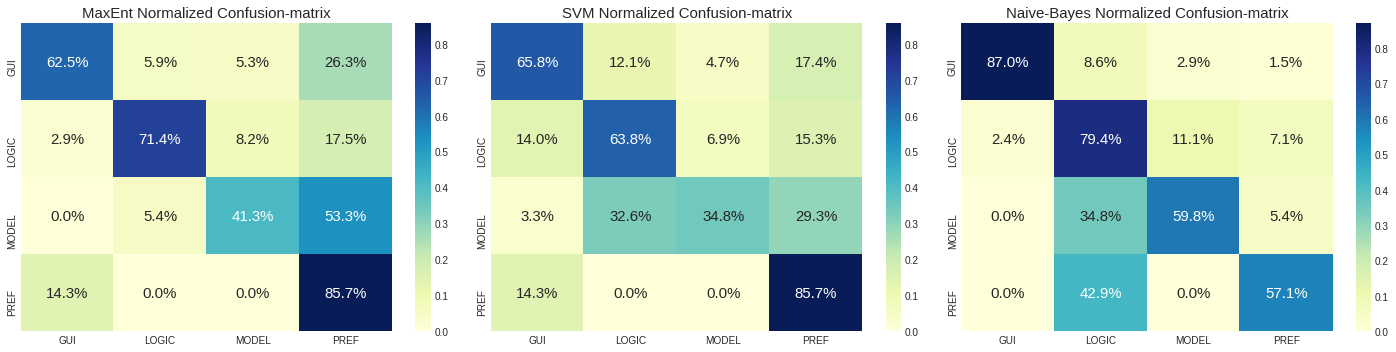

In [6]:
Graphs.plot_horizontal_graphs(metrics, 'norm')

## Classification report

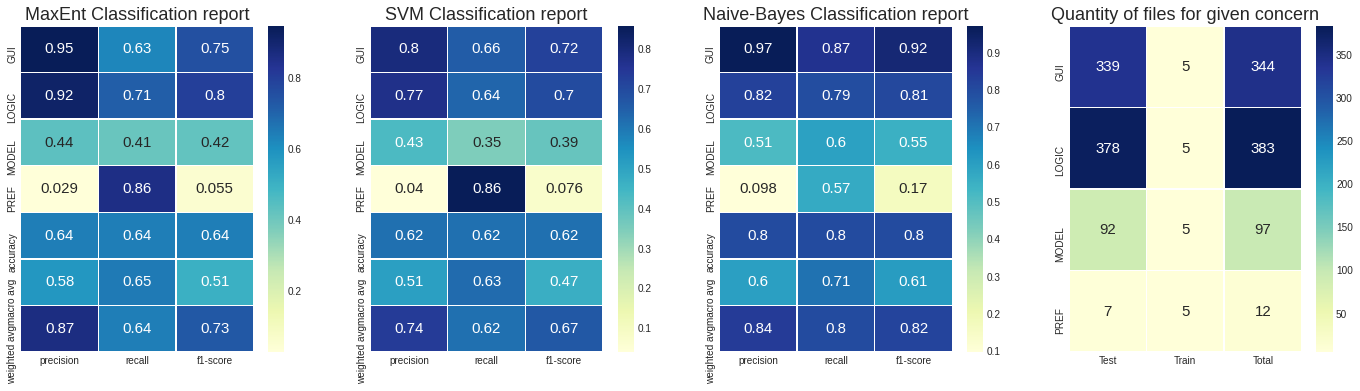

<Figure size 432x288 with 0 Axes>

In [7]:
#fig, axis = plt.subplots(1,4, figsize=(18, 5))
#axis[0].set_title(metrics_max_ent.name + " Classification report",fontsize = 15)
#axis[1].set_title(metrics_svm.name + " Classification report",fontsize = 15)
#axis[2].set_title(metrics_naive.name + " Classification report",fontsize = 15)
#axis[3].set_title("Quantity", fontsize=15)
#fig1 = metrics_max_ent.plot_data_info(axis[0])
#fig2 = metrics_svm.plot_data_info(axis[1])
#fig3 = metrics_naive.plot_data_info(axis[2])
#metrics_naive.plot_support_table(axis[3])
#plt.tight_layout()
#plt.show()
Graphs.plot_horizontal_graphs(metrics, 'report')

## prediction average

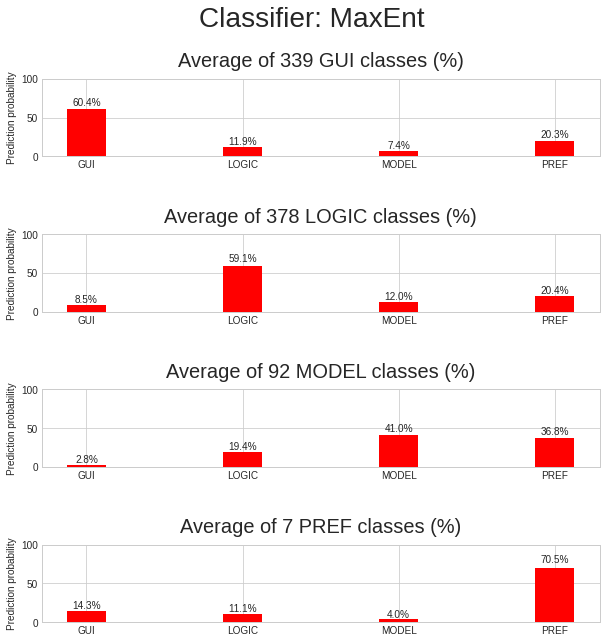

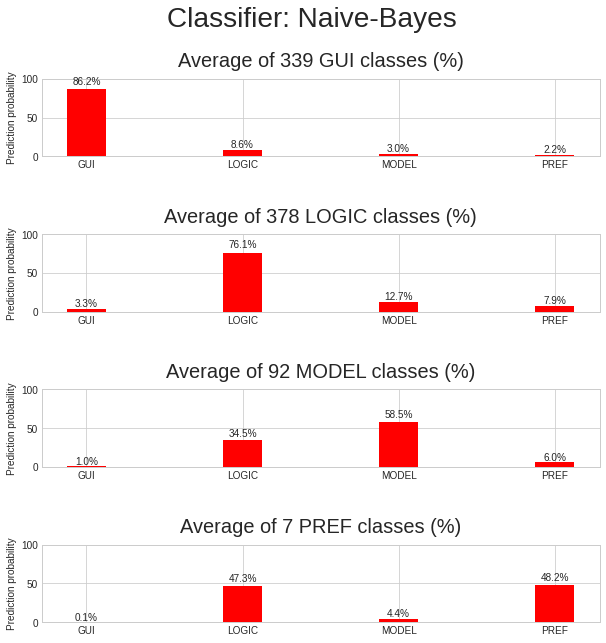

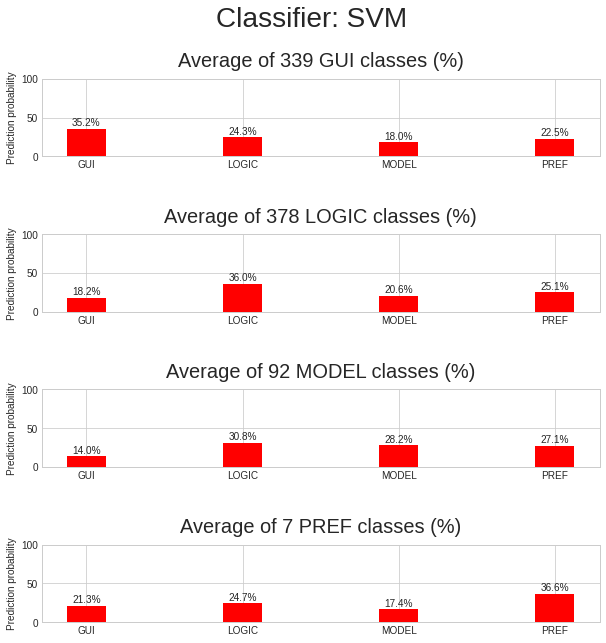

In [9]:
Graphs.plot_predictionScoreAverage(metrics_max_ent, classifier_max_ent)
Graphs.plot_predictionScoreAverage(metrics_naive, classifier_naive)
Graphs.plot_predictionScoreAverage(metrics_svm, classifier_svm)

In [10]:
maxEnt_accuracy_test2.append(metrics_max_ent.get_accuracy_score())
svm_accuracy_test2.append(metrics_svm.get_accuracy_score())
naive_accuracy_test2.append(metrics_naive.get_accuracy_score())

maxEnt_precision_test2.append(metrics_max_ent.get_precision_score())
svm_precision_test2.append(metrics_svm.get_precision_score())
naive_precision_test2.append(metrics_naive.get_precision_score())

maxEnt_recall_test2.append(metrics_max_ent.get_recall_score())
svm_recall_test2.append(metrics_svm.get_recall_score())
naive_recall_test2.append(metrics_naive.get_recall_score())

----

# Test 10 files/ concern

In [11]:

num_of_files = 10
fold_quantity = 10
feature_representation = CountVectorizer()
# Train and gather evaluation metrics
confusion_list = []
evaluate = Eva.Evaluation(df_sliced, feature_representation,fold_quantity,numberOfFiles= num_of_files)
classifier_max_ent , metrics_max_ent = evaluate.evaluate_MaxEnt(type = 'custom')
classifier_svm , metrics_svm = evaluate.evaluate_SVM(type = 'custom')
classifier_naive, metrics_naive = evaluate.evaluate_Naive_Bayes(type = 'custom')

metrics = {
    'maxEnt': metrics_max_ent,
    'SVM': metrics_svm,
    'Naive': metrics_naive
}

# Evaluation
## Confusion matrix

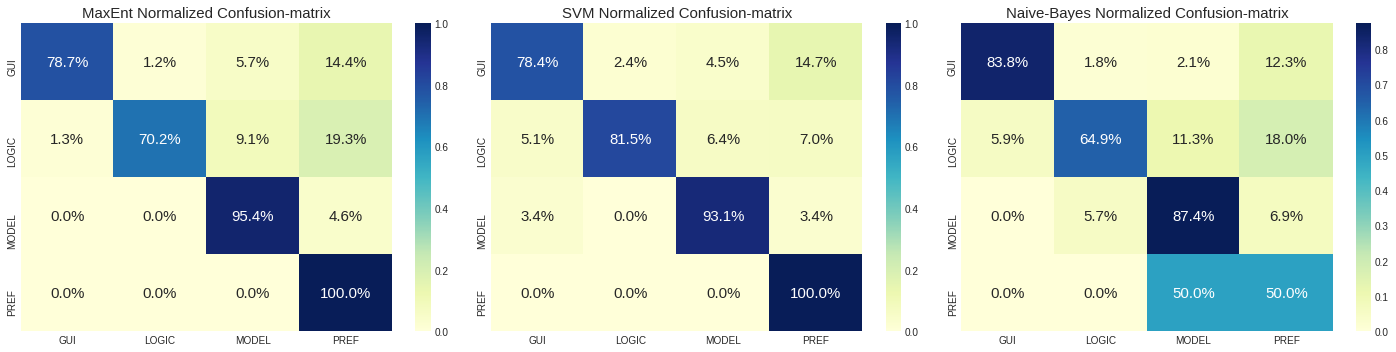

In [12]:
#fig, axis = plt.subplots(1,3, figsize=(15, 5))
#axis[0].set_title(metrics_max_ent.name + " Normalized Confusion-matrix",fontsize = 15)
#axis[1].set_title(metrics_svm.name + " Normalized Confusion-matrix",fontsize = 15)
#axis[2].set_title(metrics_naive.name + " Normalized Confusion-matrix",fontsize = 15)
#fig1 = metrics_max_ent.visualize_normalized_confusion_matrix(axis[0])
#fig2 = metrics_svm.visualize_normalized_confusion_matrix(axis[1])
#fig3 = metrics_naive.visualize_normalized_confusion_matrix(axis[2])
#plt.tight_layout()
#plt.show()
Graphs.plot_horizontal_graphs(metrics, 'norm')

# Classification report

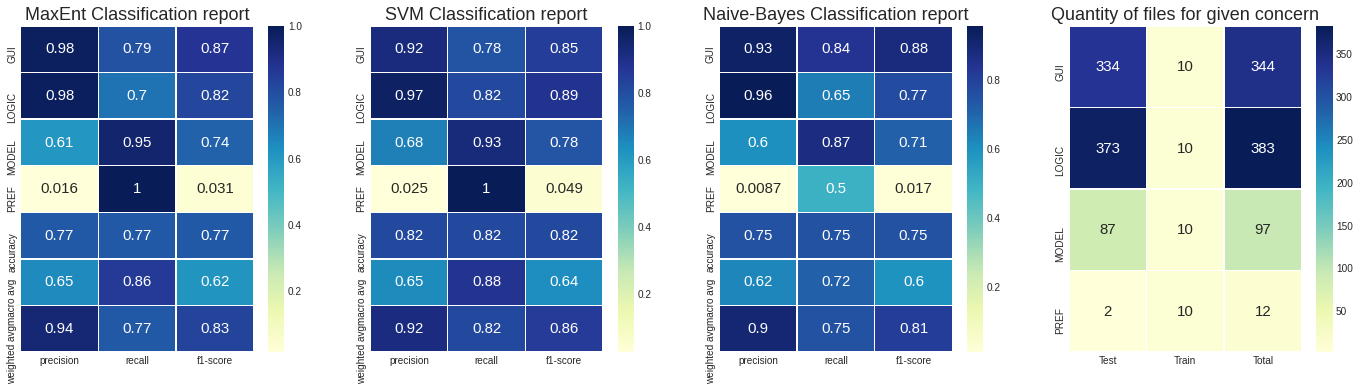

<Figure size 432x288 with 0 Axes>

In [13]:
Graphs.plot_horizontal_graphs(metrics, 'report')

# Prediction average

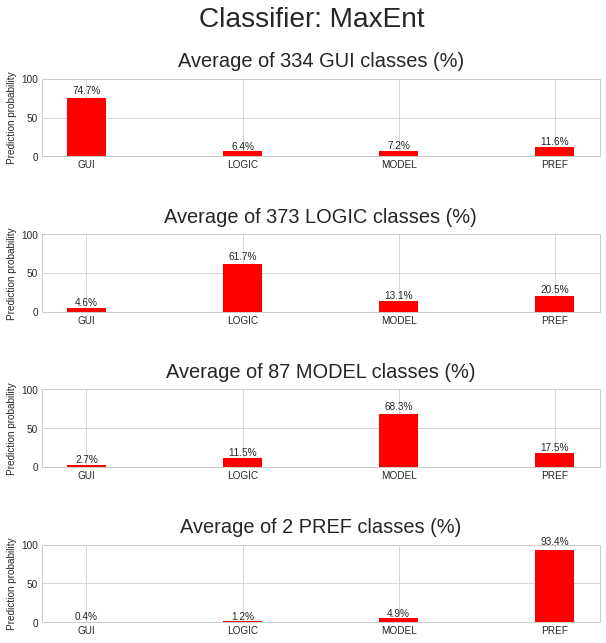

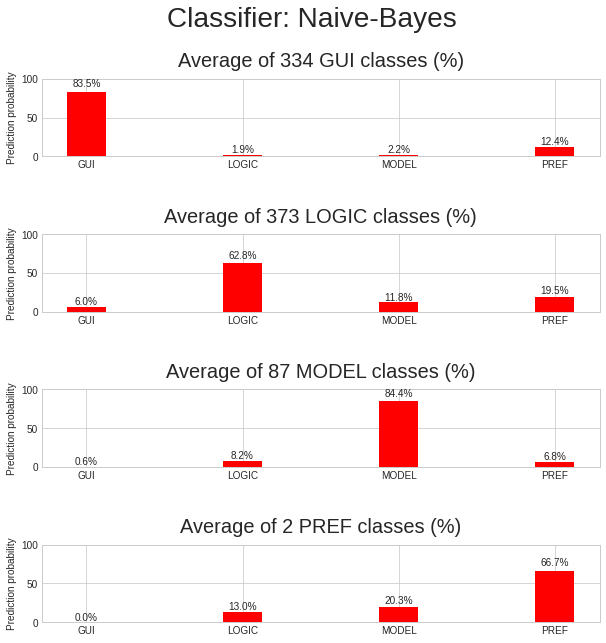

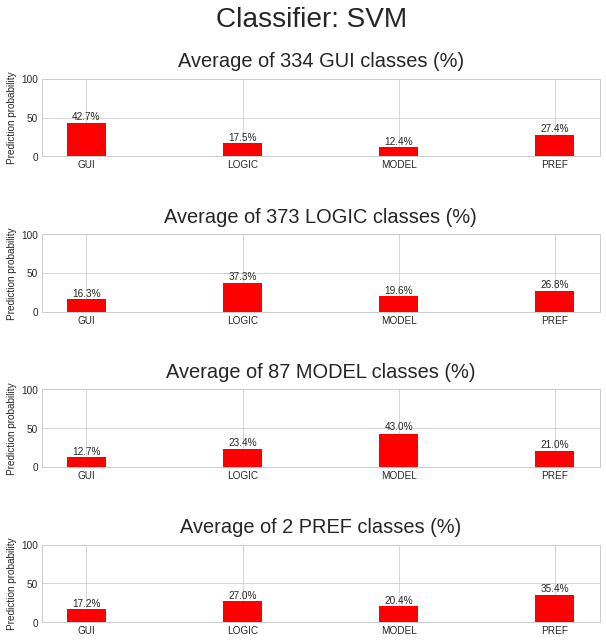

In [14]:
Graphs.plot_predictionScoreAverage(metrics_max_ent, classifier_max_ent)
Graphs.plot_predictionScoreAverage(metrics_naive, classifier_naive)
Graphs.plot_predictionScoreAverage(metrics_svm, classifier_svm)

In [15]:
maxEnt_accuracy_test2.append(metrics_max_ent.get_accuracy_score())
svm_accuracy_test2.append(metrics_svm.get_accuracy_score())
naive_accuracy_test2.append(metrics_naive.get_accuracy_score())

maxEnt_precision_test2.append(metrics_max_ent.get_precision_score())
svm_precision_test2.append(metrics_svm.get_precision_score())
naive_precision_test2.append(metrics_naive.get_precision_score())

maxEnt_recall_test2.append(metrics_max_ent.get_recall_score())
svm_recall_test2.append(metrics_svm.get_recall_score())
naive_recall_test2.append(metrics_naive.get_recall_score())

----

# Test: 15 files/concern

In [16]:
num_of_files = 15
fold_quantity = 10
feature_representation = CountVectorizer()
# Train and gather evaluation metrics
confusion_list = []
df_sliced =  Eva.filter_unwanted_labels(basic_df, 'Label', ['PREF','GLOBALS', 'CLI'])

evaluate = Eva.Evaluation(df_sliced, feature_representation,fold_quantity,numberOfFiles= num_of_files)
classifier_max_ent , metrics_max_ent = evaluate.evaluate_MaxEnt(type = 'custom')
classifier_svm , metrics_svm = evaluate.evaluate_SVM(type = 'custom')
classifier_naive, metrics_naive = evaluate.evaluate_Naive_Bayes(type = 'custom')

metrics = {
    'maxEnt': metrics_max_ent,
    'SVM': metrics_svm,
    'Naive': metrics_naive
}

# Evaluation
## Confusion matrix

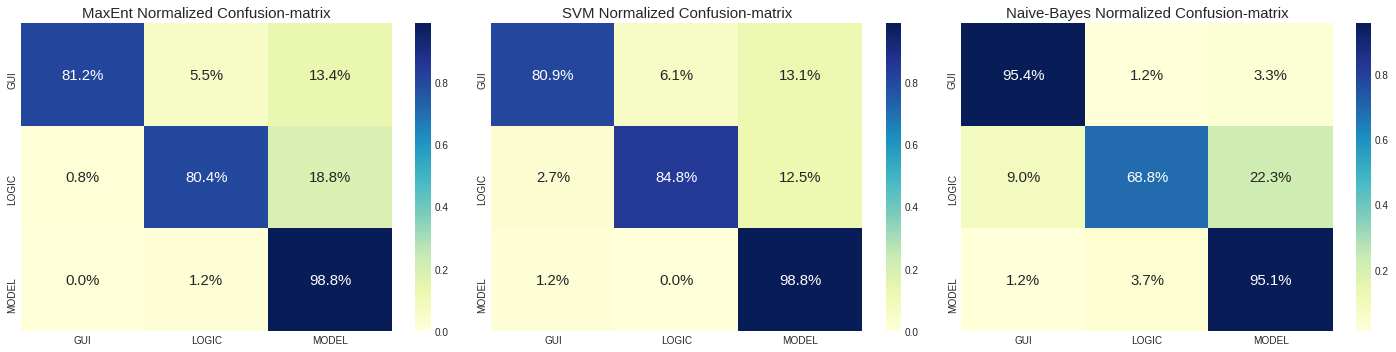

In [17]:
Graphs.plot_horizontal_graphs(metrics, 'norm')

# Classification report

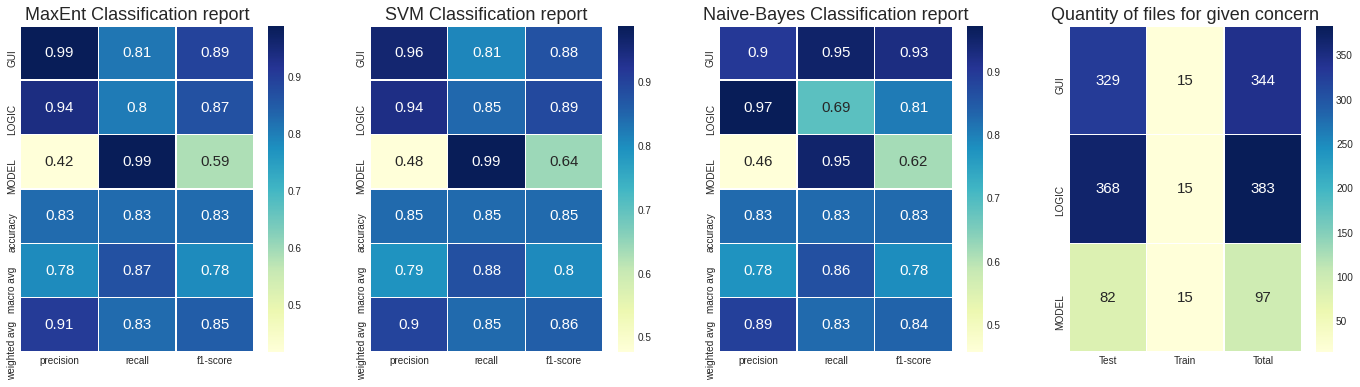

<Figure size 432x288 with 0 Axes>

In [18]:
Graphs.plot_horizontal_graphs(metrics, 'report')

# Prediction average

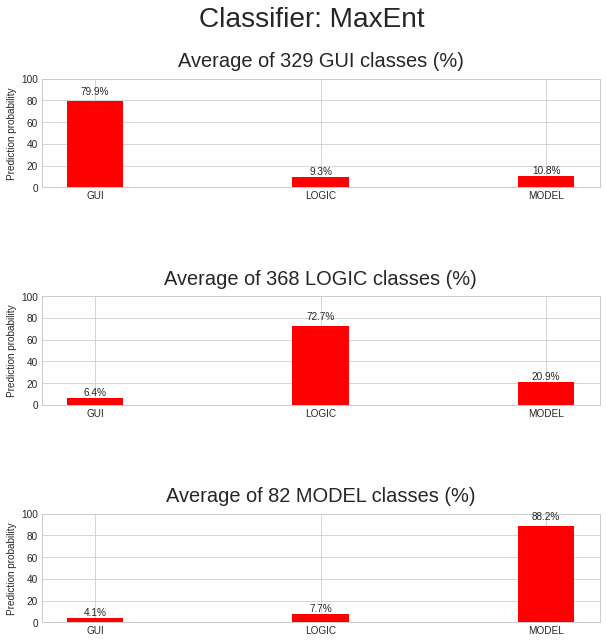

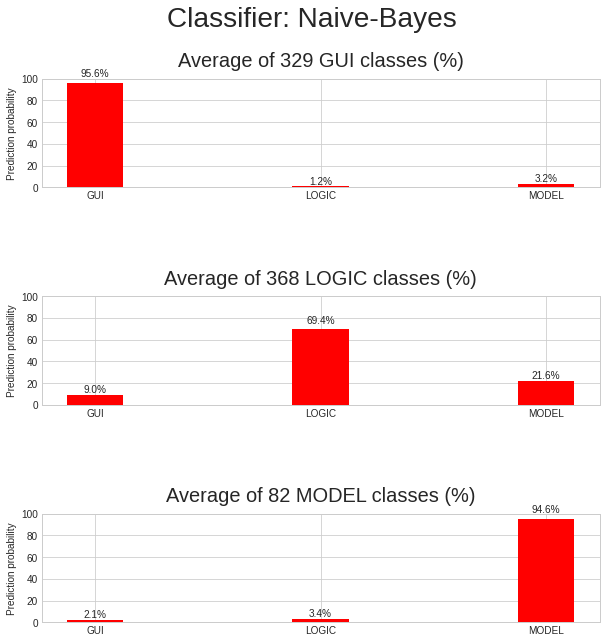

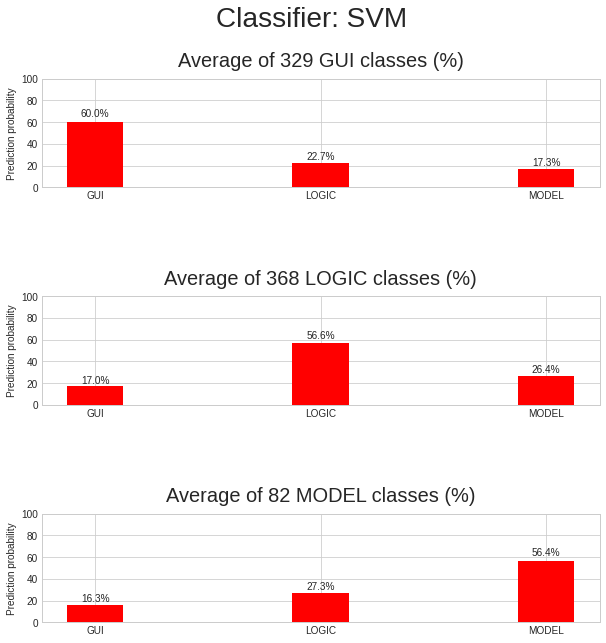

In [19]:
Graphs.plot_predictionScoreAverage(metrics_max_ent, classifier_max_ent)
Graphs.plot_predictionScoreAverage(metrics_naive, classifier_naive)
Graphs.plot_predictionScoreAverage(metrics_svm, classifier_svm)

In [20]:
maxEnt_accuracy_test2.append(metrics_max_ent.get_accuracy_score())
svm_accuracy_test2.append(metrics_svm.get_accuracy_score())
naive_accuracy_test2.append(metrics_naive.get_accuracy_score())

maxEnt_precision_test2.append(metrics_max_ent.get_precision_score())
svm_precision_test2.append(metrics_svm.get_precision_score())
naive_precision_test2.append(metrics_naive.get_precision_score())

maxEnt_recall_test2.append(metrics_max_ent.get_recall_score())
svm_recall_test2.append(metrics_svm.get_recall_score())
naive_recall_test2.append(metrics_naive.get_recall_score())

----

# Test 20 files/concern

In [21]:
num_of_files = 20
fold_quantity = 10
feature_representation = CountVectorizer()
# Train and gather evaluation metrics
confusion_list = []
df_sliced =  df_sliced = Utils.remove_concerns_under_quantity_threshold(basic_df, num_of_files)

evaluate = Eva.Evaluation(df_sliced, feature_representation,fold_quantity,numberOfFiles= num_of_files)
classifier_max_ent , metrics_max_ent = evaluate.evaluate_MaxEnt(type = 'custom')
classifier_svm , metrics_svm = evaluate.evaluate_SVM(type = 'custom')
classifier_naive, metrics_naive = evaluate.evaluate_Naive_Bayes(type = 'custom')

metrics = {
    'maxEnt': metrics_max_ent,
    'SVM': metrics_svm,
    'Naive': metrics_naive
}

# Evaluation
## Confusion matrix

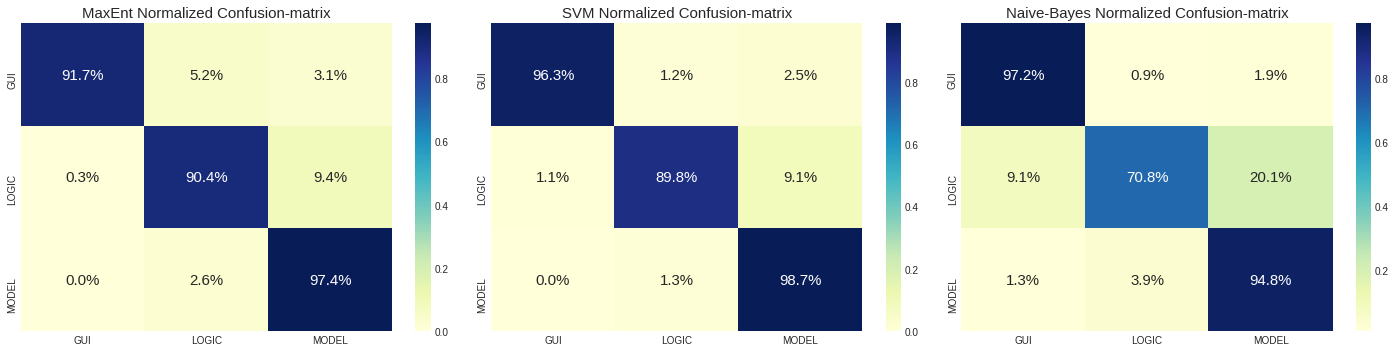

In [22]:
Graphs.plot_horizontal_graphs(metrics, 'norm')

# Classification report

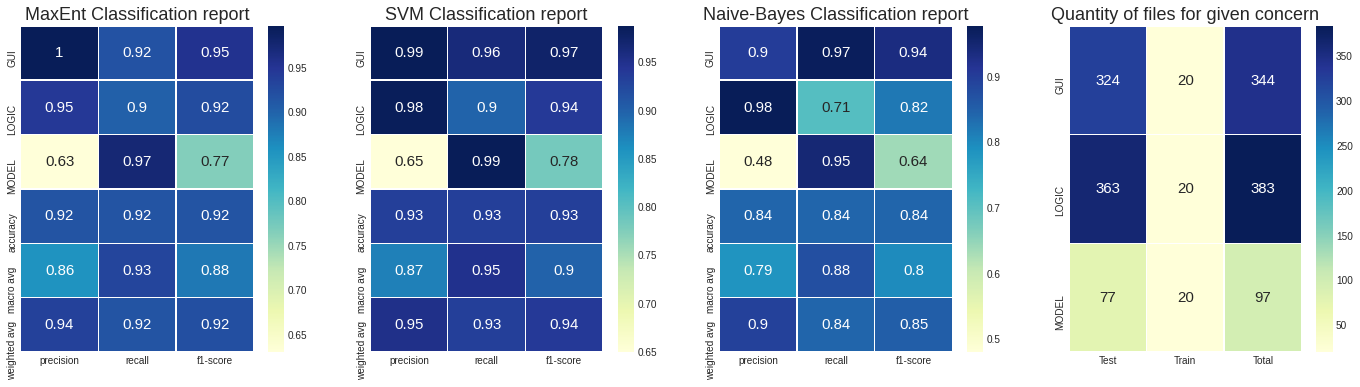

<Figure size 432x288 with 0 Axes>

In [23]:
Graphs.plot_horizontal_graphs(metrics, 'report')

# Prediction average

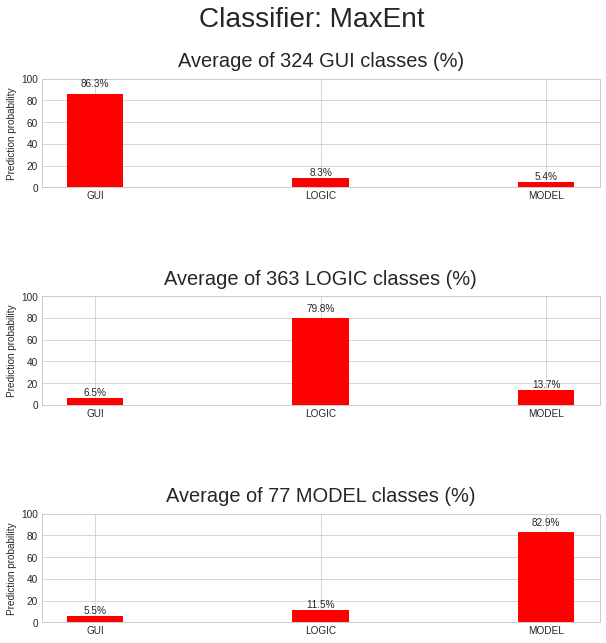

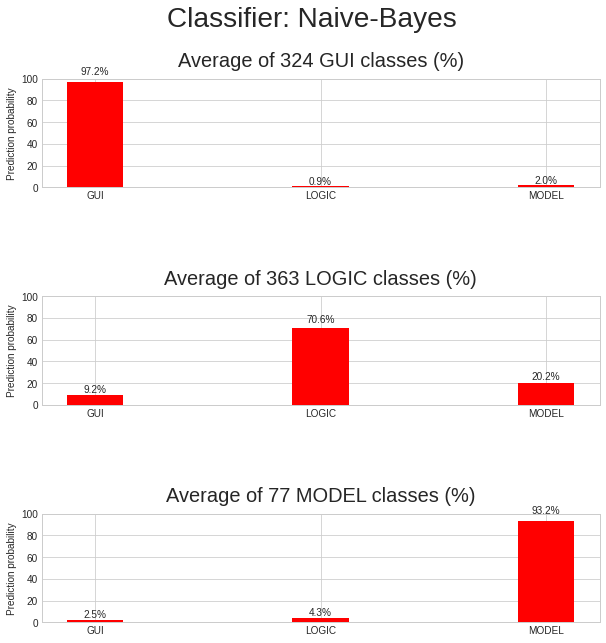

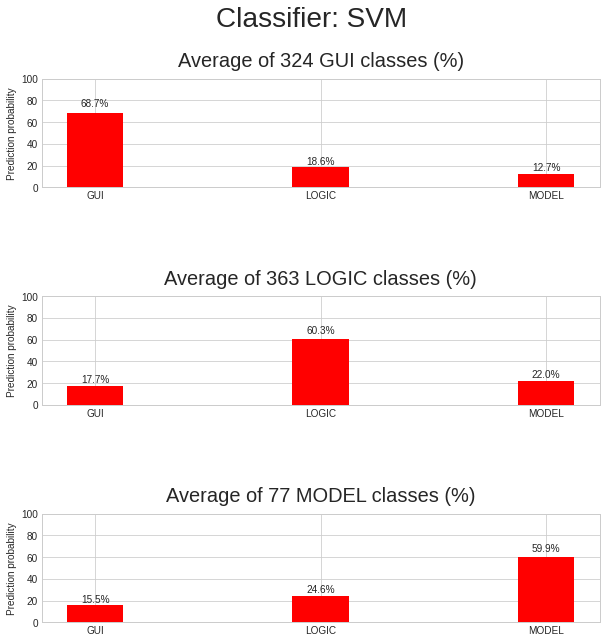

In [25]:
Graphs.plot_predictionScoreAverage(metrics_max_ent, classifier_max_ent)
Graphs.plot_predictionScoreAverage(metrics_naive, classifier_naive)
Graphs.plot_predictionScoreAverage(metrics_svm, classifier_svm)

In [26]:
maxEnt_accuracy_test2.append(metrics_max_ent.get_accuracy_score())
svm_accuracy_test2.append(metrics_svm.get_accuracy_score())
naive_accuracy_test2.append(metrics_naive.get_accuracy_score())

maxEnt_precision_test2.append(metrics_max_ent.get_precision_score())
svm_precision_test2.append(metrics_svm.get_precision_score())
naive_precision_test2.append(metrics_naive.get_precision_score())

maxEnt_recall_test2.append(metrics_max_ent.get_recall_score())
svm_recall_test2.append(metrics_svm.get_recall_score())
naive_recall_test2.append(metrics_naive.get_recall_score())

----

# Test: 25 files/concern

In [27]:
num_of_files = 25
fold_quantity = 10
feature_representation = CountVectorizer()
# Train and gather evaluation metrics
confusion_list = []
df_sliced =  df_sliced = Utils.remove_concerns_under_quantity_threshold(basic_df, num_of_files)

evaluate = Eva.Evaluation(df_sliced, feature_representation,fold_quantity,numberOfFiles= num_of_files)
classifier_max_ent , metrics_max_ent = evaluate.evaluate_MaxEnt(type = 'custom')
classifier_svm , metrics_svm = evaluate.evaluate_SVM(type = 'custom')
classifier_naive, metrics_naive = evaluate.evaluate_Naive_Bayes(type = 'custom')

metrics = {
    'maxEnt': metrics_max_ent,
    'SVM': metrics_svm,
    'Naive': metrics_naive
}

# Evaluation
## Confusion matrix

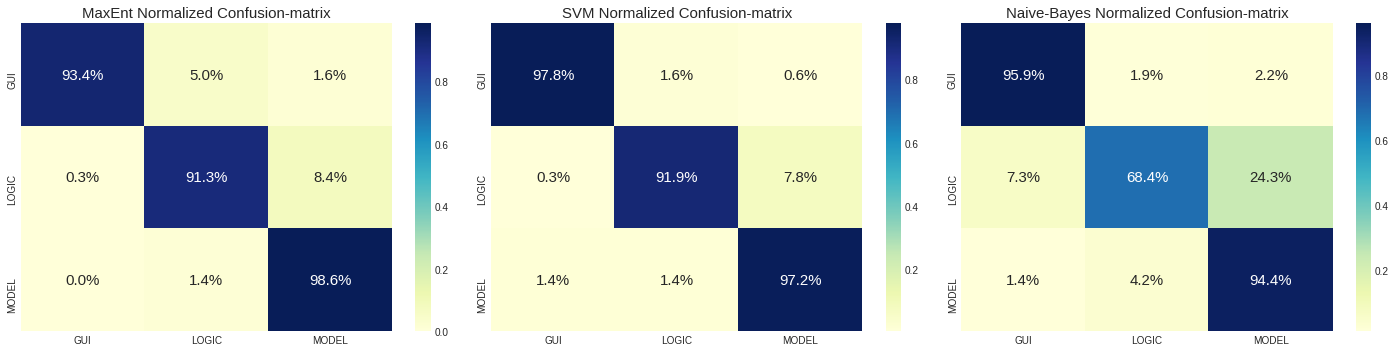

In [28]:
Graphs.plot_horizontal_graphs(metrics, 'norm')

# Classification report

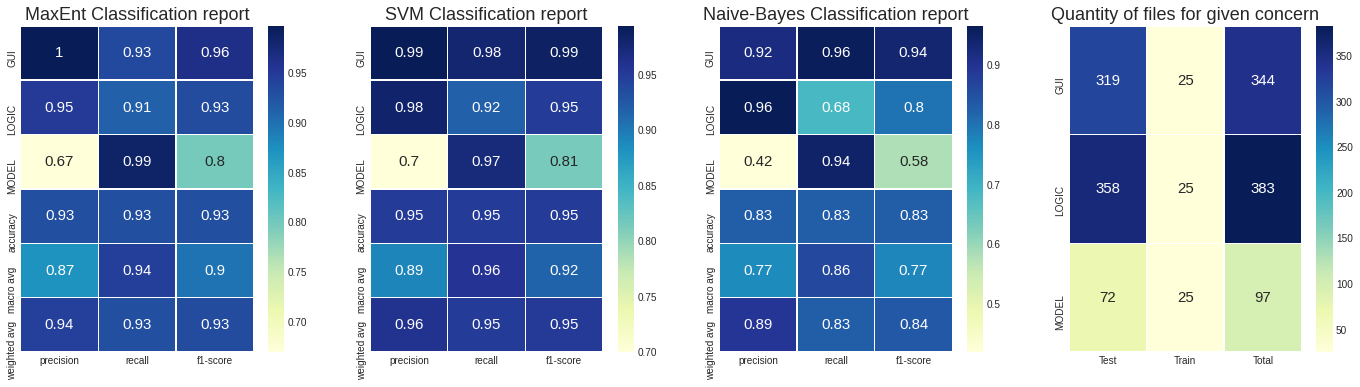

<Figure size 432x288 with 0 Axes>

In [29]:
Graphs.plot_horizontal_graphs(metrics, 'report')

# Prediction average

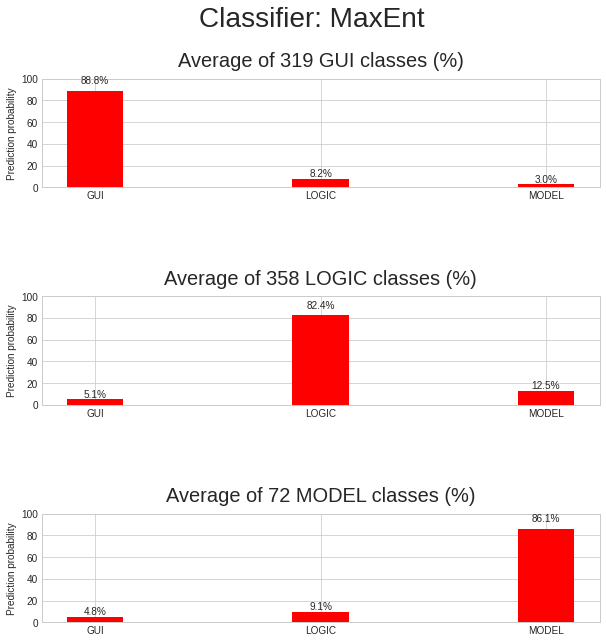

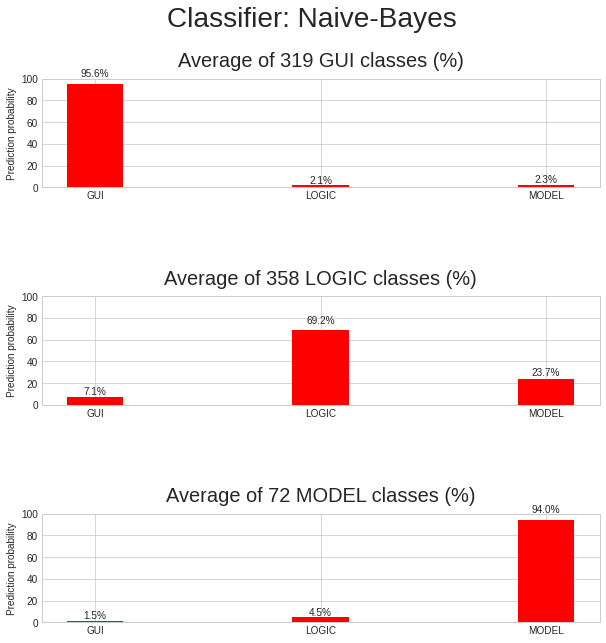

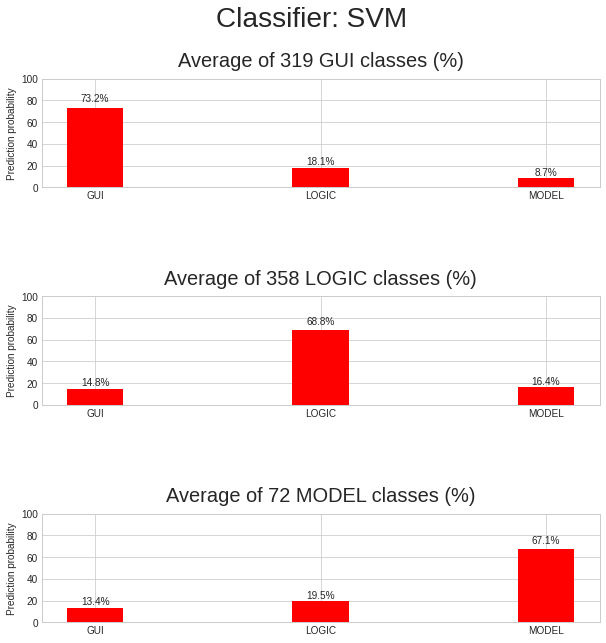

In [30]:
Graphs.plot_predictionScoreAverage(metrics_max_ent, classifier_max_ent)
Graphs.plot_predictionScoreAverage(metrics_naive, classifier_naive)
Graphs.plot_predictionScoreAverage(metrics_svm, classifier_svm)

In [31]:
maxEnt_accuracy_test2.append(metrics_max_ent.get_accuracy_score())
svm_accuracy_test2.append(metrics_svm.get_accuracy_score())
naive_accuracy_test2.append(metrics_naive.get_accuracy_score())

maxEnt_precision_test2.append(metrics_max_ent.get_precision_score())
svm_precision_test2.append(metrics_svm.get_precision_score())
naive_precision_test2.append(metrics_naive.get_precision_score())

maxEnt_recall_test2.append(metrics_max_ent.get_recall_score())
svm_recall_test2.append(metrics_svm.get_recall_score())
naive_recall_test2.append(metrics_naive.get_recall_score())

----

# Test: 30 files/concern

In [32]:
num_of_files = 30
fold_quantity = 10
feature_representation = CountVectorizer()
# Train and gather evaluation metrics
confusion_list = []
df_sliced =  df_sliced = Utils.remove_concerns_under_quantity_threshold(basic_df, num_of_files)

evaluate = Eva.Evaluation(df_sliced, feature_representation,fold_quantity,numberOfFiles= num_of_files)
classifier_max_ent , metrics_max_ent = evaluate.evaluate_MaxEnt(type = 'custom')
classifier_svm , metrics_svm = evaluate.evaluate_SVM(type = 'custom')
classifier_naive, metrics_naive = evaluate.evaluate_Naive_Bayes(type = 'custom')

metrics = {
    'maxEnt': metrics_max_ent,
    'SVM': metrics_svm,
    'Naive': metrics_naive
}

# Evaluation
## Confusion matrix

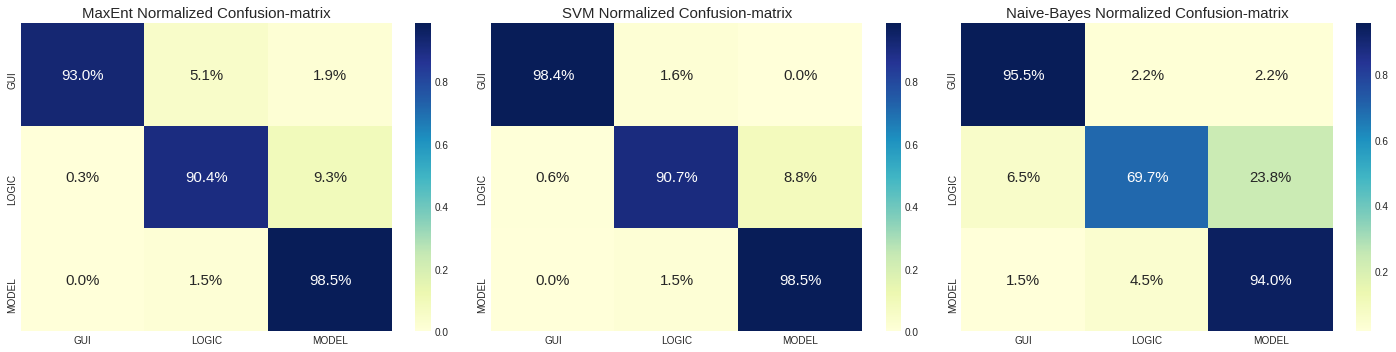

In [33]:
Graphs.plot_horizontal_graphs(metrics, 'norm')

# Classification report

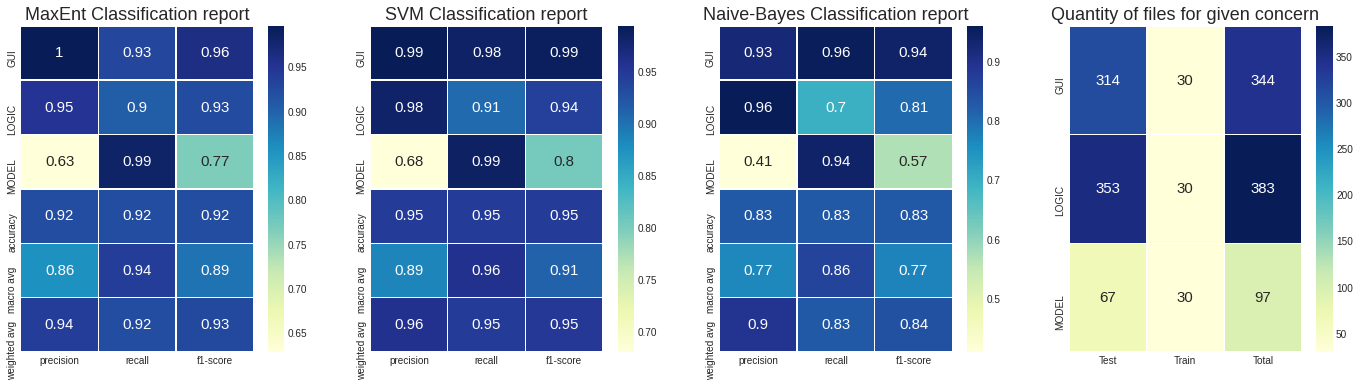

<Figure size 432x288 with 0 Axes>

In [34]:
Graphs.plot_horizontal_graphs(metrics, 'report')

# Prediction average

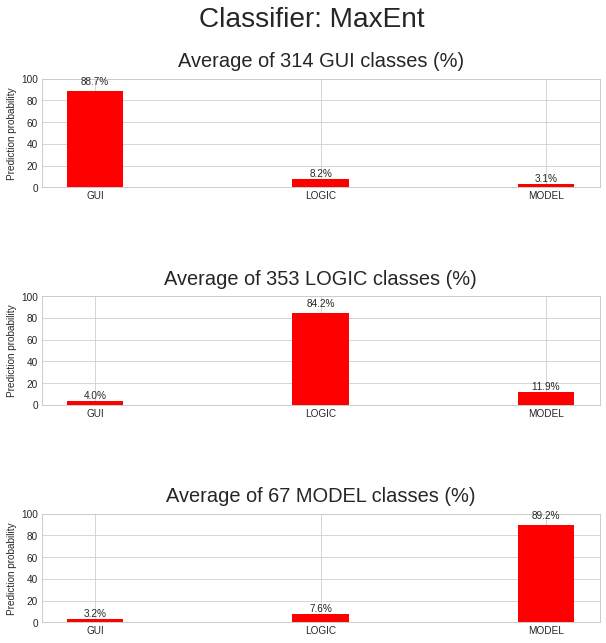

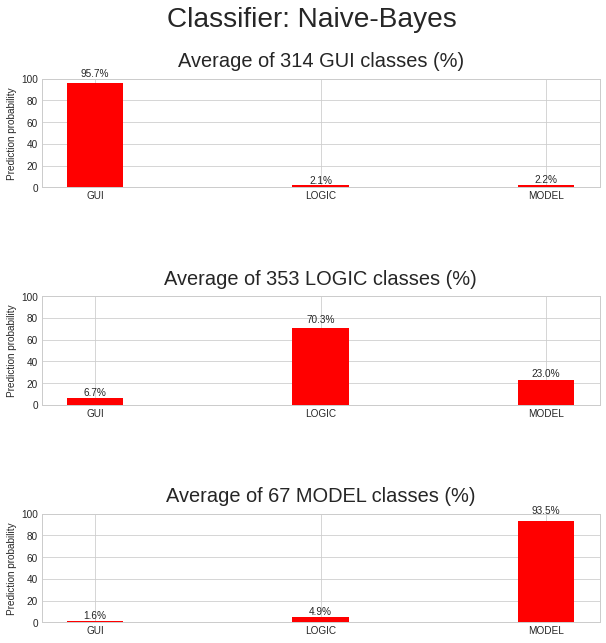

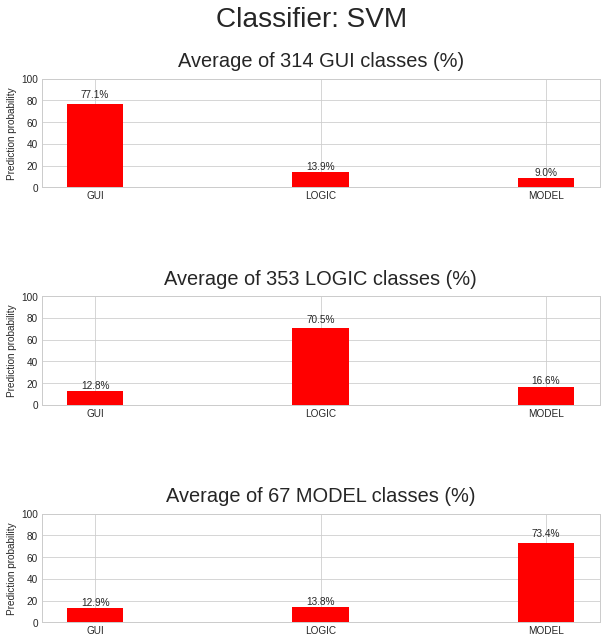

In [35]:
Graphs.plot_predictionScoreAverage(metrics_max_ent, classifier_max_ent)
Graphs.plot_predictionScoreAverage(metrics_naive, classifier_naive)
Graphs.plot_predictionScoreAverage(metrics_svm, classifier_svm)

In [36]:
maxEnt_accuracy_test2.append(metrics_max_ent.get_accuracy_score())
svm_accuracy_test2.append(metrics_svm.get_accuracy_score())
naive_accuracy_test2.append(metrics_naive.get_accuracy_score())

maxEnt_precision_test2.append(metrics_max_ent.get_precision_score())
svm_precision_test2.append(metrics_svm.get_precision_score())
naive_precision_test2.append(metrics_naive.get_precision_score())

maxEnt_recall_test2.append(metrics_max_ent.get_recall_score())
svm_recall_test2.append(metrics_svm.get_recall_score())
naive_recall_test2.append(metrics_naive.get_recall_score())

----

# Overall performance for number of files

In [37]:
number_of_files = ['5','10','15','20','25', '30']
y_axis = {
    'naive': naive_accuracy_test2,
    'maxEnt': maxEnt_accuracy_test2,
    'svm': svm_accuracy_test2
}
#########ACCURACY#############################

Graphs.plot_line_graph("Accuracy over over train size", number_of_files , {'naive': naive_accuracy_test2,
                                                             'maxEnt': maxEnt_accuracy_test2,
                                                             'svm': svm_accuracy_test2
                                                            }, "Train size", "Accuracy")
##############################################

##############PRECISION#######################
Graphs.plot_line_graph("Weighted avg. precision over train size", number_of_files, {'naive': naive_precision_test2,
                                                             'maxEnt': maxEnt_precision_test2,
                                                             'svm': svm_precision_test2
                                                            }, "Train size", "W.avg. precision",)
##############RECALL#######################
Graphs.plot_line_graph("Weighted avg. recall over train size", number_of_files, {'naive': naive_recall_test2,
                                                             'maxEnt': maxEnt_recall_test2,
                                                             'svm': svm_recall_test2
                                                            }, "Train size", "W.avg. recall",)




NameError: name 'G' is not defined